## Context
Many popular comforts of modern day society rely upon complex algorithms that are designed to increase user enagement and interaction with a system. These systems are called recommendation systems. Building recommendation systems is a huge part of the daily work of data scientists at data centric firms such as Amazon, Netflix, Spotify, Microsoft, and Google. However, today, almost any company can benefit from building in-house recommendation systems that aim at increasing user engagement.

## Problem Statement

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.

## Dataset Used
Million Song Dataset divided into two files which includes the following:

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song
Dataset. There are two files in this dataset. One contains the details about the song id, titles, release,
artist name and the year of release. Second file contains the user id, song id and the play count of
users.
File - song_data
1. song_id - A unique id given to every song
2. title - Title of the song
3. Release - Name of the released album
4. Artist_name - Name of the artist
5. year - Year of release
file - count_data
1. user _id - A unique id given to the user
2. song_id - A unique id given to the song

## Objective
Utilize various libraries such as Surprise, TensorFLow, Keras, Scikit-Learn, to build various recommendation systems to see which system provides the best end result. We will utilize data science methods of Collaborative filtering and content-based methods to build a recommendation system that is suitable for various users. In doing so, we hope to have several business benefits that would increase user interaction, user engagement and potential revenue increase. 

# Algorithms
One of the issues that exists in this dataset is the fact that we do not have explicit ratings data to utlize in our recommendations. WHat we do have is number of times a song is played. While this is great for popularity based recommendation systems, this poses some hurdles for the more user-centric collaborative filtering methods. We will have to transform the data in a way that would make it applicable to the Nearest neighbor and Single Value Decomposition factorized matrix. 

## Handling Cold Starts
When the system has no information in terms of previous plays, a short user interview can help the system populate with songs from that user's specified genre, whereafter we can suggest songs with the highest play counts from other users - popularity - until the user has provided sufficient information and interactions to the system to be provided with more user-centric recommendations. 

## Metric to be used
Because we want to predict which songs a particular user would want to listen to, we will utilize the Root Mean Square Error(RSME)
<img src="rsme.jpg">

In [ ]:


pip install surprise

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import surprise
from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate


In [4]:
# import files
song_data = pd.read_csv('song_data.csv')
count_data = pd.read_csv('count_data.csv')

In [5]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [6]:
count_data.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [7]:
df = pd.merge(song_data, count_data, on= 'song_id')

In [8]:
df.head()

,song_id,title,release,artist_name,year,Unnamed: 0,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,334,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,1537,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2206,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,23688,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,28969,2bcef2a30bd8913405971761a0e6c292d771c086,1


In [9]:
df.columns.values

array(['song_id', 'title', 'release', 'artist_name', 'year', 'Unnamed: 0',
       'user_id', 'play_count'], dtype=object)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_id      object
 1   title        object
 2   release      object
 3   artist_name  object
 4   year         int64 
 5   Unnamed: 0   int64 
 6   user_id      object
 7   play_count   int64 
dtypes: int64(3), object(5)
memory usage: 143.3+ MB


In [120]:
df.shape

(421170, 7)

In [103]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_id      object
 1   title        object
 2   release      object
 3   artist_name  object
 4   year         int64 
 5   user_id      object
 6   play_count   int64 
dtypes: int64(2), object(5)
memory usage: 127.4+ MB


In [105]:
df

,song_id,title,release,artist_name,year,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1
...,...,...,...,...,...,...,...
2086941,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,37781fff15682ccd92aface63f66d3f525e2f88f,1
2086942,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,49e66adb87d5d39781add88c202aa9802010e848,3
2086943,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,9d659bb73b93384297f240a4adadccf4d81bd681,1
2086944,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,c65a346ab8f41fb56926b503ece810f358b0d241,1


## Check for missing data


In [106]:
df.isna().sum()

song_id        0
title          0
release        0
artist_name    0
year           0
user_id        0
play_count     0
dtype: int64

## EDA - Exploratory data analysis

## Missing Song Year Data - Titles
Some songs are missing the year that the song was released. These values have been replaced with a 0. Furthermore, some of the song titles have weird names, because we are not sure about these items, we will leave them as is in the data.

### Number of songs and users

In [107]:
n_users = df.user_id.nunique()
n_songs = df.song_id.nunique()
print(n_users)
print(n_songs)

76353
10000


In [108]:
df.play_count.nunique()

295

### Play count distribution

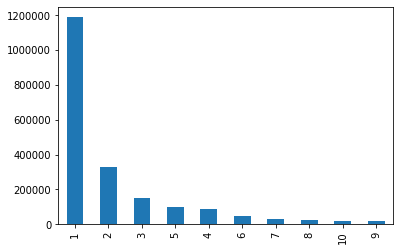

In [109]:
df['play_count'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

## Filter out songs that were only played once or twice

In [118]:
df = df[df['play_count'] > 3]
df

,song_id,title,release,artist_name,year,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
10,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,88635e641f8761318e318a9d799a6ba3f03a0580,8
11,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,a7f18f3c9ff442c49369628eed6575bb076854cb,4
12,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,a9af7c6186ea3053a00bbc76c886f94bc5ff524e,7
...,...,...,...,...,...,...,...
2086838,SOKATLY12A8C132FE2,FU-GEE-LA,The Score,Fugees,1996,cf74ed958dad8d8da7295b5e8a746f53748a2a7d,5
2086841,SOKATLY12A8C132FE2,FU-GEE-LA,The Score,Fugees,1996,ce8f4d7d26ab3014750755a27515672dd3ac0f9c,19
2086875,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,f16aa219244fa6b115e8062a45c2de3de3fc87e7,4
2086879,SOBPQCK12AF72A2FD5,The Outer Banks,In A Safe Place,The Album Leaf,2004,46c309056e4a2a7aa09c50cd32071fc356ca7a3b,7


In [119]:
df.shape

(421170, 7)

In [127]:
df.play_count.max()

2213

## Proposed Approaches

### Popularity based model(not shown)
For this approach, we will just utilize the play count as ratings and simply recommend the most played songs

### Nearest Neighbor
This approach is more involved and directly applies to the problem statement mentioned previously. This approach measures the similarity between users and items which in this case are songs. For the item -based model, there is an assumption that song similarity can be clustered and associated with users who also share a set of similarities. Therefore, similiar users, based on features can be recommended similiar songs, also based on features.

### Single Value Decomposition (SVD)
Because features can grow tremendously and complicate already complex algorithms, we utilize SVD which can be employed to reduce the number of deatures of a dataset. However, this dataset presents a manageable amount of features. 

### Transforming the dataset
As mentioned above, this dataset does not contain explocit ratings so we will attempt to utilize the number of times played as a proxy for rating. We have already filtered out plays of less than 3 and we believe that plays of less than 3 do not represent a strong enough track-record(excuse the pun) for potential recommendation. 

Above we have calculated that the maximum play count is 2213, we will adjust this on a scale of 0 - 5 and assign the ratings accordinly.

## Create Training and Test Sets



In [38]:
cols = ['song_id', 'user_id', 'play_count']

## Create surprise dataset

In [130]:
reader = Reader(rating_scale = (3,2213))
data = Dataset.load_from_df(df[cols], reader)

## Create Train-set and Prediction-set

In [ ]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

## Creating and training the model

#### We will use SVD here( SIngular Value Decomposition)
#### Interaction Matrix = AXBXC

In [138]:
algo = SVD(n_epochs = 25, verbose = True)

### Training the model
**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 

**Root mean squared error (RMSE)**:  RMSE is the square root of the average of squared differences between prediction and actual observation.

In [150]:
cross_validate(algo, data, measures = ['RSME', 'MAE'], cv=5, n_jobs = 5, verbose = True)

ValueError: Incorrect value for n_splits=0. Must be >=2 and less than the number of ratings